In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay
from sklearn import metrics
# from sklearn.metrics import mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import sklearn.preprocessing as preproc

In [2]:
df = pd.read_csv('shared/complaints_25Nov21.csv')
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,No,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


In [3]:
X = df[['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via', 'Company response to consumer', 'Timely response?']]
X

,Product,Sub-product,Issue,State,Tags,Submitted via,Company response to consumer,Timely response?
0,Money transfers,International money transfer,Other transaction issues,NaN,NaN,Web,Closed with explanation,Yes
1,Bank account or service,Other bank product/service,"Account opening, closing, or management",PA,Older American,Web,Closed with explanation,Yes
2,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",PA,NaN,Web,Closed with monetary relief,Yes
3,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",VA,Servicemember,Phone,Closed with explanation,Yes
4,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",GA,NaN,Referral,Closed with explanation,Yes
...,...,...,...,...,...,...,...,...
207255,Debt collection,Credit card,Taking/threatening an illegal action,FL,NaN,Web,Closed with explanation,Yes
207256,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NY,NaN,Referral,Closed without relief,Yes
207257,Student loan,Non-federal student loan,Repaying your loan,NH,NaN,Web,Closed with explanation,Yes
207258,Bank account or service,Checking account,"Account opening, closing, or management",CA,NaN,Web,Closed with non-monetary relief,Yes


In [4]:
y=df['Consumer disputed?']
y

0          No
1          No
2          No
3         Yes
4          No
         ... 
207255     No
207256    Yes
207257     No
207258     No
207259     No
Name: Consumer disputed?, Length: 207260, dtype: object

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['Consumer disputed?'])
y

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
X = X.fillna('missing')

In [7]:
X = pd.get_dummies(X)
X

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
0,False,False,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,False,False,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
207256,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
207257,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
207258,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

In [9]:
#Q1

In [10]:
test_set_disputed = sum(y_test == 1)/len(y_test)
test_set_disputed

0.21586413200810575

In [11]:
#Q2

In [12]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=123)
X_train, y_train = undersampler.fit_resample(X, y)

In [13]:
train_set_disputed = sum(y_train == 1)/len(y_train)
train_set_disputed

0.5

In [14]:
#Q3

In [15]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(random_state = 123)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

              precision    recall  f1-score   support

           0       0.85      0.53      0.66     32504
           1       0.28      0.65      0.39      8948

    accuracy                           0.56     41452
   macro avg       0.56      0.59      0.52     41452
weighted avg       0.73      0.56      0.60     41452



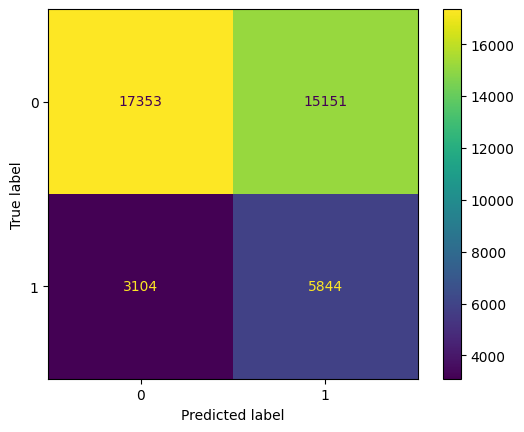

In [16]:
pred = model_xgb.predict(X_test)
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test);

In [17]:
#Q4

In [18]:
cost_without_model = 32504*100 + 8948*600
cost_without_model

8619200

In [19]:
#Q5

In [20]:
cost_with_model = 17353*100 + 15151*190 + 3104*600 + 5844*190
cost_with_model

7586750

In [21]:
cost = np.array([[100, 190], [600, 190]])
cost

array([[100, 190],
       [600, 190]])

In [22]:
#Q6+Q7

Confusion Matrix : 
 [[   44 32460]
 [    0  8948]]
Test accuracy =  0.2169256006947795
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     32504
           1       0.22      1.00      0.36      8948

    accuracy                           0.22     41452
   macro avg       0.61      0.50      0.18     41452
weighted avg       0.83      0.22      0.08     41452



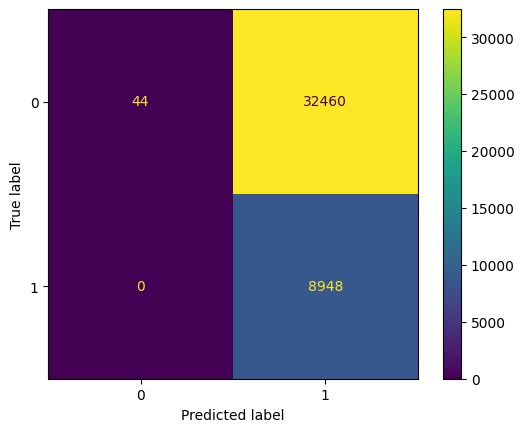

In [23]:
# Set threshold for identifying class 1
threshold = 0.1

# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model_xgb.predict_proba(X_test)

# We drop the probabilities for class 0, and keep just the second column
pred_prob = pred_prob[:,1]

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)

# confusion matrix
cm01 = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm01)
ConfusionMatrixDisplay(confusion_matrix=cm01).plot();

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))
print(classification_report(y_true = y_test, y_pred = pred,))

In [24]:
cost_with_threshold_01 = np.multiply(cm01, cost)
np.sum(cost_with_threshold_01)

7871920

Confusion Matrix : 
 [[11614 20890]
 [ 1612  7336]]
Test accuracy =  0.4571552639197144
              precision    recall  f1-score   support

           0       0.88      0.36      0.51     32504
           1       0.26      0.82      0.39      8948

    accuracy                           0.46     41452
   macro avg       0.57      0.59      0.45     41452
weighted avg       0.74      0.46      0.48     41452



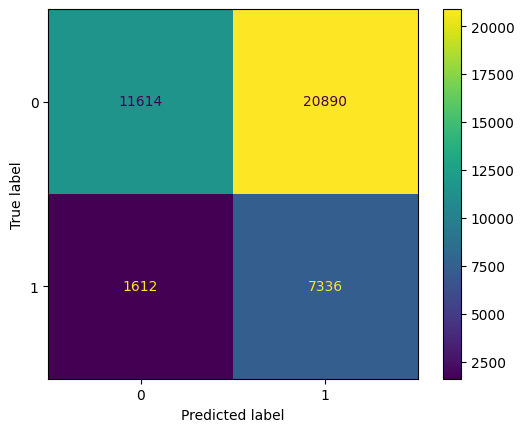

In [25]:
# Set threshold for identifying class 1
threshold = 0.46

# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model_xgb.predict_proba(X_test)

# We drop the probabilities for class 0, and keep just the second column
pred_prob = pred_prob[:,1]

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)

# confusion matrix
cm046 = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm046)
ConfusionMatrixDisplay(confusion_matrix=cm046).plot();

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))
print(classification_report(y_true = y_test, y_pred = pred,))

In [26]:
cost_with_threshold_046 = np.multiply(cm046, cost)
np.sum(cost_with_threshold_046)

7491540

Confusion Matrix : 
 [[22247 10257]
 [ 4467  4481]]
Test accuracy =  0.644793978577632
              precision    recall  f1-score   support

           0       0.83      0.68      0.75     32504
           1       0.30      0.50      0.38      8948

    accuracy                           0.64     41452
   macro avg       0.57      0.59      0.56     41452
weighted avg       0.72      0.64      0.67     41452



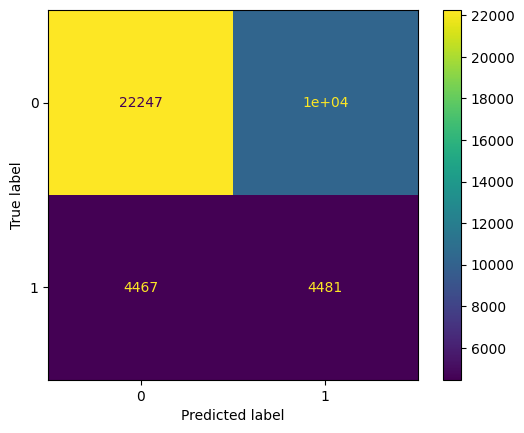

In [27]:
# Set threshold for identifying class 1
threshold = 0.54

# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model_xgb.predict_proba(X_test)

# We drop the probabilities for class 0, and keep just the second column
pred_prob = pred_prob[:,1]

# Convert probabilities to 1s and 0s based on threshold
pred = (pred_prob>threshold).astype(int)

# confusion matrix
cm054 = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm054)
ConfusionMatrixDisplay(confusion_matrix=cm054).plot();

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))
print(classification_report(y_true = y_test, y_pred = pred,))

In [28]:
cost_with_threshold_054 = np.multiply(cm054, cost)
np.sum(cost_with_threshold_054)

7705120